In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from msc_filtering import MyKalmanFilter

## Test Kalman filtering

####  Constant with constant model

Water tank with constant level at L=1

Define kalman filter params

In [2]:
x0 = 0  # Initial value - arbitrary guess
p0 = 1000  # State covariances (Error of estimation) - High since unknown
q = 0.0001  # System noise
r = 0.1  # Measurement noise

Define process model

In [3]:
def constant_func(input):
    return input

Instantiate filter

In [4]:
testFilter_const = MyKalmanFilter(x0, p0, constant_func, r, q)

Initialise model


Evaluate against synthetic data

In [5]:
%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.9, 0.8, 1.1, 1, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]
for measure in measure_list:
    testFilter_const.step(measure);
    xt_intr_list.append(testFilter_const.xt_intr)
    Pt_intr_list.append(testFilter_const.Pt_intr)
    k_gain_list.append(testFilter_const.k_gain)
    xt_curr_list.append(testFilter_const.xt_curr)
    Pt_curr_list.append(testFilter_const.Pt_curr)

Check results

In [6]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_level = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [7]:
df_level

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,0.000000,1000.000100,0.999900,0.899910,0.099990
1,0.899910,0.100090,0.500225,0.849933,0.050022
2,0.849933,0.050122,0.333877,0.933424,0.033388
3,0.933424,0.033488,0.250867,0.950126,0.025087
4,0.950126,0.025187,0.201193,0.950101,0.020119
5,0.950101,0.020219,0.168187,0.966902,0.016819
6,0.966902,0.016919,0.144705,1.000633,0.014470
7,1.000633,0.014570,0.127175,0.987835,0.012717
8,0.987835,0.012817,0.113613,0.972175,0.011361
9,0.972175,0.011461,0.102827,0.990460,0.010283


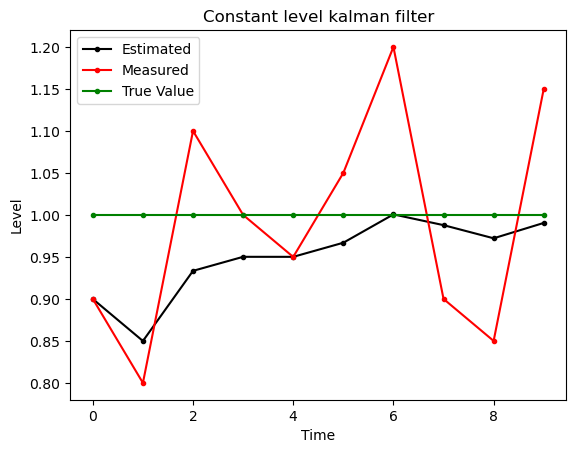

In [8]:
plt.plot(df_level.index, df_level['xt_curr'] ,marker=".",color="black")
plt.plot(df_level.index, measure_list ,marker=".",color="red")
plt.plot(df_level.index, np.ones(len(df_level.index)) ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()

#### Constant increasing with constant model

Water tank with constant filling at 0.1

In [9]:
rising_level = 0
gt_level = []

steps = 6
for _ in range(steps):
    rising_level = rising_level + 0.1
    gt_level.append(rising_level)

In [10]:
gt_level

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6]

Define kalman filter params

In [11]:
x0 = 0  # Initial value - arbitrary guess
p0 = 1000  # State covariances (Error of estimation) - High since unknown
q = 0.001  # System noise
r = 0.1  # Measurement noise

Instantiate filter

In [12]:
testFilter_rising = MyKalmanFilter(x0, p0, constant_func, r, q)

Initialise model


Evaluate against synthetic data

In [13]:
%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.11, 0.29, 0.32, 0.5, 0.58, 0.54]
for measure in measure_list:
    testFilter_rising.step(measure);
    
    # Record time steps    
    xt_intr_list.append(testFilter_rising.xt_intr)
    Pt_intr_list.append(testFilter_rising.Pt_intr)
    k_gain_list.append(testFilter_rising.k_gain)
    xt_curr_list.append(testFilter_rising.xt_curr)
    Pt_curr_list.append(testFilter_rising.Pt_curr)

Check results

In [14]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_rising_level = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [15]:
df_rising_level

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,0.000000,1000.001000,0.999900,0.109989,0.099990
1,0.109989,0.100990,0.502463,0.200438,0.050246
2,0.200438,0.051246,0.338827,0.240949,0.033883
3,0.240949,0.034883,0.258615,0.307943,0.025861
4,0.307943,0.026861,0.211739,0.365548,0.021174
5,0.365548,0.022174,0.181494,0.397210,0.018149


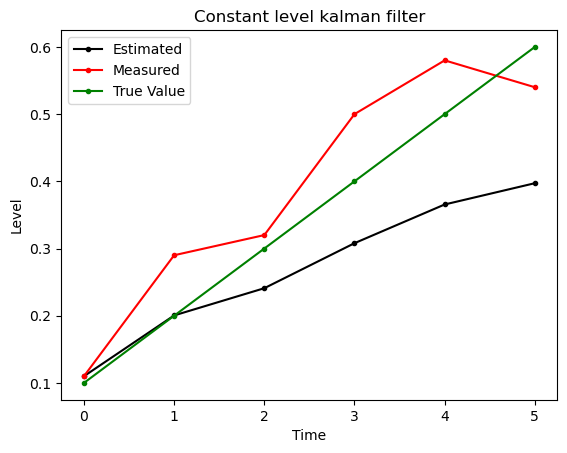

In [16]:
plt.plot(df_rising_level.index, df_rising_level['xt_curr'] ,marker=".",color="black")
plt.plot(df_rising_level.index, measure_list ,marker=".",color="red")
plt.plot(df_rising_level.index, gt_level ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()